In [3]:
import modules.plot_func as pltt
import modules.traj_analysis as tran
import modules.helper_func_class as misc
import matplotlib.pyplot as plt
import numpy as np
import networkx
import random


# gerando posicioes aleatorias
#r = 2*np.random.random((1000,2))-1
#r[:,0] = r[:,0]*1
#r[:,1] = r[:,1]*5
#print(r)

In [14]:
import scipy

print('versao do networkx',networkx.__version__)
print('versao do numpy',np.__version__)
print('versao do scipy',scipy.__version__)


versao do networkx 2.8.8
versao do numpy 1.21.5
versao do scipy 1.8.0


In [4]:
def Tamanho_da_Caminhada(L):
    """
    cria lista de vizinhos e probabilidade de dar um passo pra cada vizinho
    """
    pstep = 0.25

    G = networkx.grid_graph((L,L),periodic=False)

    A = networkx.adjacency_matrix(G)

    vizinhos = []
    stepprob = []
    for k in range(L*L):
        vizinhos.append(np.nonzero(np.asarray(A[:,k].todense()).flatten())[0])
        pstep_vizinhos = pstep * np.ones(vizinhos[-1].size)
        stepprob.append(pstep_vizinhos/np.sum(pstep_vizinhos))

    return vizinhos,stepprob

def start_point(L):
    if (L%2==0):
        start_position = (L*(L-1)/2)-1 #define o ponto inicial no quadrado superior do centro do lattice
        return int(start_position)
    else:
        start_position = (L*L-1)/2 #define o ponto inicial no quadrado central
    return int(start_position)

def passo_na_caminhada(vizinhos,stepprob):
    """
    decide o sitio vizinho pra dar um passo
    """
    s_p  = stepprob
    k    = 0
    r    = random.random()
    p0   = 0.0
    p1   = s_p[0]
    for k in range(len(s_p)):
        p1 = p0 + s_p[k]
        if (r >= p0) and (r < p1):
            return vizinhos[k]
        p0 = p1
    return vizinhos[k]

def Caminhada_Aleatoria_2D(L, T):
    """
    realiza uma caminhada aleatoria em um lattice 2D quadrado
    L -> tamanho lateral do lattice
    T -> tempo total (nro de passos de tempo) para caminhar

    returns
        pos_list -> lista de posicoes (indice linear)
    """
    vizinhos , stepprob = Tamanho_da_Caminhada(L)

    current_position = start_point(L)
    pos_list         = [start_point(L)]

    for _ in range(T):
        current_position = passo_na_caminhada(vizinhos[current_position],stepprob[current_position])
        pos_list.append(current_position)

    return pos_list

In [5]:
vizinhos,stepprob = Tamanho_da_Caminhada(4)

vizinhos

<ipython-input-4-0833c95dcd53>:9: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = networkx.adjacency_matrix(G)


[array([1, 4], dtype=int64),
 array([0, 2, 5], dtype=int64),
 array([1, 3, 6], dtype=int64),
 array([2, 7], dtype=int64),
 array([0, 5, 8], dtype=int64),
 array([1, 4, 6, 9], dtype=int64),
 array([ 2,  5,  7, 10], dtype=int64),
 array([ 3,  6, 11], dtype=int64),
 array([ 4,  9, 12], dtype=int64),
 array([ 5,  8, 10, 13], dtype=int64),
 array([ 6,  9, 11, 14], dtype=int64),
 array([ 7, 10, 15], dtype=int64),
 array([ 8, 13], dtype=int64),
 array([ 9, 12, 14], dtype=int64),
 array([10, 13, 15], dtype=int64),
 array([11, 14], dtype=int64)]

In [15]:
L = 21
pos_list = Caminhada_Aleatoria_2D(L, 10000)

pos_list = np.array(pos_list)

y,x = np.unravel_index(pos_list,(L,L))

<ipython-input-4-0833c95dcd53>:9: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = networkx.adjacency_matrix(G)


In [16]:
def Caminhada_Aleatoria_2D_de_max_T(L,N,T_values):
    T_max    = np.max(T_values)
    T_values = np.array(T_values).flatten()

    p_all  = [None for _ in range(N)]
    x_list = [None for _ in range(N)]
    y_list = [None for _ in range(N)]
    for k in range(N):
        position_list = Caminhada_Aleatoria_2D(L,T_max)
        y,x           = np.unravel_index(position_list,(L,L))
        p_all[k]  = np.array(position_list).flatten()
        x_list[k] = x[T_values]
        y_list[k] = y[T_values]

    return np.array(x_list),np.array(y_list),p_all



In [28]:
T_values = [5,6,10,11,500,501,1000,1001] # lista organizada e em ordem crescente
N        = 100 # Número de passos em cada caminhada
L        = 21 # Dimenções de Lattice
lista_x,lista_y,p_all = Caminhada_Aleatoria_2D_de_max_T(L,N,T_values)


<ipython-input-4-0833c95dcd53>:9: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = networkx.adjacency_matrix(G)


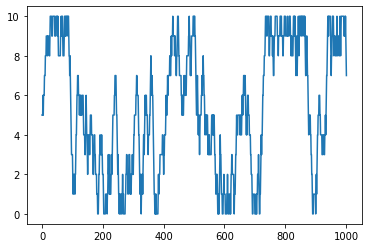

In [29]:
plt.figure()
plt.plot(np.arange(x.size),x)
plt.show()

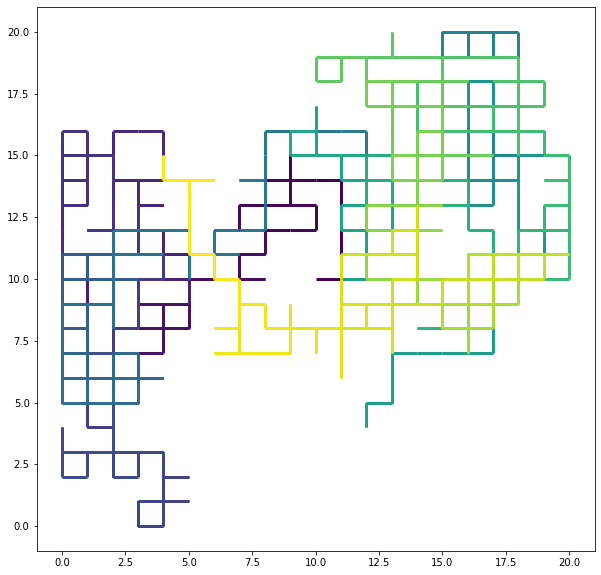

In [34]:
y,x=np.unravel_index(p_all[0],(L,L))

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,10))

pltt.plot_gradient_line(np.array((x,y)).T,ax=ax,cmap=plt.get_cmap('viridis'))
ax.set_xlim((-1,L))
ax.set_ylim((-1,L))
plt.show()

In [35]:
r_T_5    = np.column_stack((lista_x[:,0],lista_y[:,0]))
r_T_6    = np.column_stack((lista_x[:,1],lista_y[:,1]))

r_T_10   = np.column_stack((lista_x[:,2],lista_y[:,2]))
r_T_11   = np.column_stack((lista_x[:,3],lista_y[:,3]))
r_T_500  = np.column_stack((lista_x[:,4],lista_y[:,4]))
r_T_501  = np.column_stack((lista_x[:,5],lista_y[:,5]))
r_T_1000 = np.column_stack((lista_x[:,6],lista_y[:,6]))
r_T_1001 = np.column_stack((lista_x[:,7],lista_y[:,7]))


In [38]:
r_T_56       = np.row_stack((r_T_5,r_T_6))
r_T_1011     = np.row_stack((r_T_10,r_T_11))
r_T_500501   = np.row_stack((r_T_500,r_T_501))
r_T_10001001 = np.row_stack((r_T_1000,r_T_1001))


In [18]:
#r_mean, r_cov, r_dispersion, r_eigdir = misc.calc_dispersion(r) #exemple
#
#fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,10))
#
#pltt.plot_trajectory_points(r,ax=ax,use_scatter=False,linestyle='none',marker='.')
#pltt.plot_dispersion(r_mean,r_eigdir,r_dispersion,ax=ax,zorder=1000,facecolor=np.array((0,0,0,0.2)))
#plt.axis('square')
#plt.show()

In [67]:
x

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]])

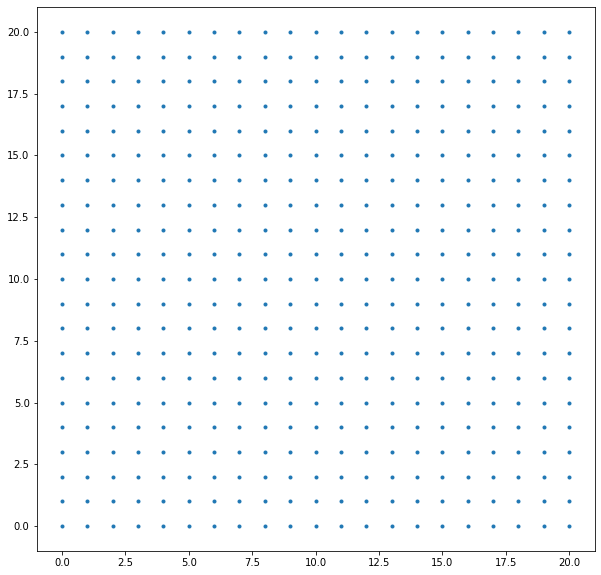

In [39]:
x,y = np.meshgrid(np.arange(L),np.arange(L))

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,10))
pltt.plot_trajectory_points(np.array((x.flatten(),y.flatten())).T,ax=ax,use_scatter=False,linestyle='none',marker='.')
plt.show()

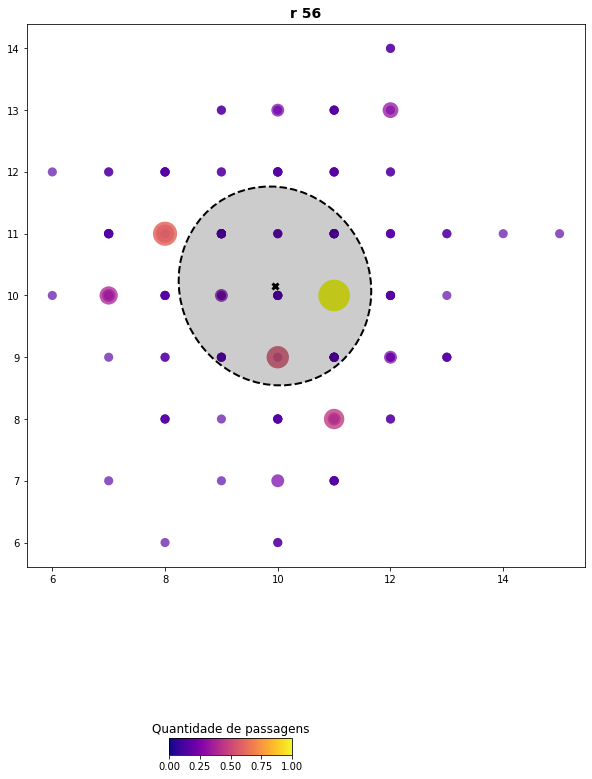

In [60]:
import sys
del sys.modules['modules.traj_analysis']
del sys.modules['modules.plot_func']
del tran
del pltt
import modules.traj_analysis as tran
import modules.plot_func as pltt

#r_mean, r_cov, r_dispersion, r_eigdir = misc.calc_dispersion(r_T_56)

r_un,r_count,r_mean,r_cov,r_dispersion,r_eigdir = tran.calc_number_of_checkings_per_hole_from_pos(r_T_56.astype(float),normalize_by='max',grouping_hole_horizon=1e-4,sort_result=True)


show_panel_labels = False
is_dark_bg        = False
get_color         = lambda c_is_dark,c_not_dark: c_is_dark if is_dark_bg else c_not_dark
cmap_name         = 'plasma' # pltt.get_cmap_plasma_inv_lum()
point_size        = 1e3
color_bg_dark     = plt.get_cmap(cmap_name)(np.linspace(0,1,100))[0]
color_red         = np.array((255, 66, 66,255))/255
color_blue        = np.array(( 10, 30,211,255))/255
color_green       = np.array(( 34,201, 98,255))/255# if is_dark_bg else numpy.array((17, 112, 50,255))/255
alpha_alt_target  = 0.35

default_panel_param  = dict(show_holes=True,holes_args=dict(markersize=4,markeredgewidth=0.4,color=0.5*np.ones(3),markerfacecolor=np.array((1,1,1,0.7)),fillstyle='full'),
                            panel_label_args=None,target1_label_args=None,is_dark_bg=False,cmap_name=cmap_name,
                            point_size=point_size,color_bg_dark='#000000',cmap_start_fraction=0.15,
                            start_args=dict(markerfacecolor='w',fillstyle='full',markeredgecolor='k',markeredgewidth=3),
                            scatter_args=dict(min_alpha=0.7),
                            ellipse_args=dict(facecolor=np.array((0,0,0,0.2))))
plot_args = pltt._get_kwargs(dict(scatter_args       = dict(min_alpha=0.65),show_start=True,start_label_args=dict(fontsize=15,ha='right',va='top'   ,pad=(-4,0)),
                                             panel_label        = 'r 56' ,
                                             panel_label_args   = dict(fontdict=dict(fontsize=26,fontweight='bold')),
                                             target1_label      = 'A',
                                             target1_label_args = dict()                                ,
                                             color_target1      = color_red ,alpha_target1=1.0,
                                             target2_label      = 'REL A',
                                             target2_label_args = dict(va='top',ha='left',pad=(3,0)),
                                             target1_args       = dict(marker='o',markersize=10,markerfacecolor='w',markeredgewidth=2,fillstyle='full'),
                                             target2_args       = dict(marker='^',markersize=11,markerfacecolor='w',markeredgewidth=2,fillstyle='full'),
                                             color_target2      = color_red ,alpha_target2=1.0,
                                             is_target1_present=False,is_target2_present=False), **default_panel_param)



fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,10))

pltt._plot_hole_check_spatial_distribution_from_pos(r_un, r_count  ,  np.array((np.nan,np.nan))   , r_mean  , r_eigdir  ,r_dispersion  , ax=ax, **plot_args)
cax = pltt._add_colorbar(ax,cmap_name,w_fraction_of_ax=0.22,h_fraction_of_ax=0.03,p0=(0.5,-0.3),minmax_tick_labels=('zero','alta'),orientation='horizontal',title='Quantidade de passagens',titleArgs=dict(color=get_color('w','k'),fontsize=12),ticklabelsArgs=dict(color=get_color('w','k')))



#pltt.plot_trajectory_points(r_T_56,ax=ax,use_scatter=False,linestyle='none',marker='.')
#pltt.plot_dispersion(r_mean,r_eigdir,r_dispersion,ax=ax,zorder=1000,facecolor=np.array((0,0,0,0.2)))


#plt.axis('square')
plt.show()

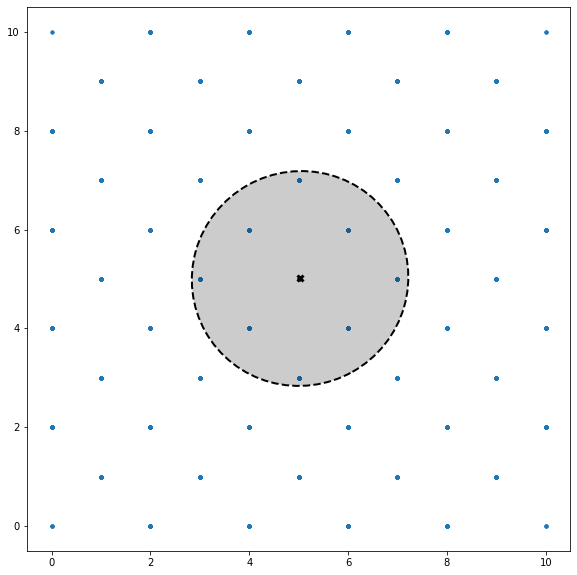

In [59]:
r_mean, r_cov, r_dispersion, r_eigdir = misc.calc_dispersion(r_T_10)

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,10))

pltt.plot_trajectory_points(r_T_10,ax=ax,use_scatter=False,linestyle='none',marker='.')
pltt.plot_dispersion(r_mean,r_eigdir,r_dispersion,ax=ax,zorder=1000,facecolor=np.array((0,0,0,0.2)))
plt.axis('square')
plt.show()

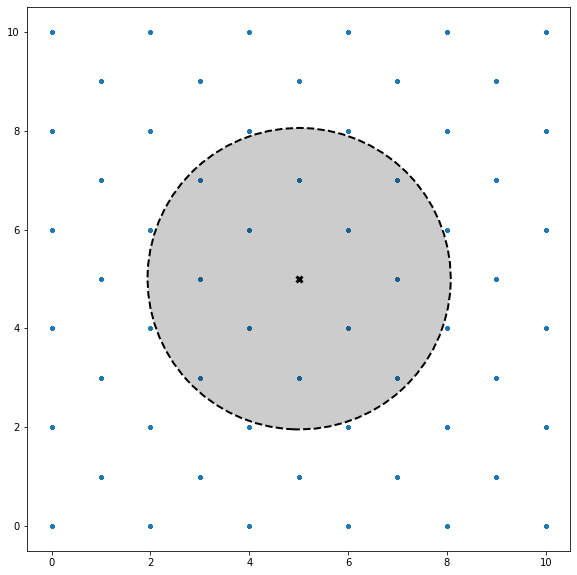

In [60]:
r_mean, r_cov, r_dispersion, r_eigdir = misc.calc_dispersion(r_T_500)

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,10))

pltt.plot_trajectory_points(r_T_500,ax=ax,use_scatter=False,linestyle='none',marker='.')
pltt.plot_dispersion(r_mean,r_eigdir,r_dispersion,ax=ax,zorder=1000,facecolor=np.array((0,0,0,0.2)))
plt.axis('square')
plt.show()

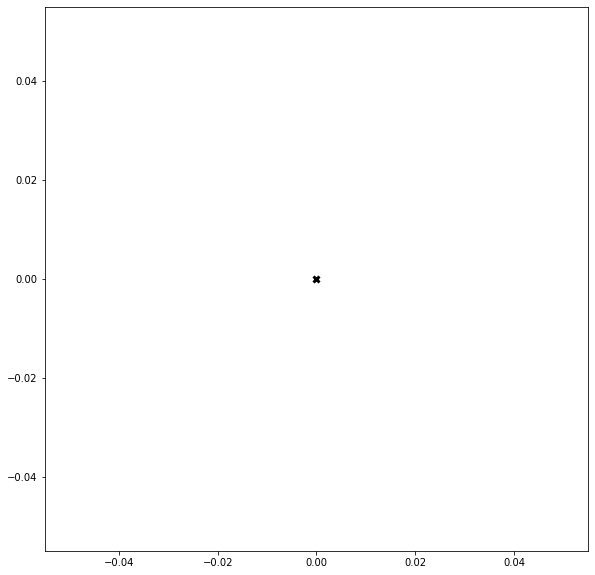

In [15]:
r_mean, r_cov, r_dispersion, r_eigdir = misc.calc_dispersion(r_T_1000)

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,10))

pltt.plot_trajectory_points(r_T_1000,ax=ax,use_scatter=False,linestyle='none',marker='.')
pltt.plot_dispersion(r_mean,r_eigdir,r_dispersion,ax=ax,zorder=1000,facecolor=np.array((0,0,0,0.2)))
plt.axis('square')
plt.show()

In [3]:
import modules.plot_func as pltt
import modules.traj_analysis as tran

tran.calc_number_of_checkings_per_hole
pltt._plot_hole_check_spatial_distribution